## Universidad Nacional De Colombia
## Introduction to Optimization
### First Excercices

### Presented by Daniel Felipe Quinones Ordonez

# First Point

#### Related with the nature of the data, which conditions should meet matrices  A  and  b  to be solvable from the least squares perspective.

#### Answer:
When we have a data set what we are looking is that there is no linear dependency among the points, or observations in our case. Also the "well" behavior of the data will imply a good condition number of the resultant matrix. That is 

$k = ||A||*||A||^{-1}$

Based on that we see that the data matrix must have inverse, that could give us additional conditions over the data, that depending of our resolution algorithm, approach, constraints in the problem, could give us a better approximation to the best solution possible. Some examples ot those conditions are if the matrix is a Vandermonde mayrtix, the inverse is granted for obsevation values, all differentes among themselves.[1]






### References:

[1] Rescued from: Polynomial regression, Wikipedia. https://en.wikipedia.org/wiki/Polynomial_regression

# Second Point

Importing the data of bitocins values of a whole month

In [40]:
using CSV
using DataFrames

bitcoinData = CSV.read("C:\\Users\\danqu\\Documents\\UNAL\\CC\\introOpti\\bitcoin.csv", DataFrame);
bitcoinData.Price .= replace.(bitcoinData.Price, "," => "");
bitcoinData.PriceFloat = parse.(Float64, bitcoinData.Price);

In [130]:
bMarch = bitcoinData.PriceFloat

29-element Vector{Float64}:
 38014.8
 38403.1
 39395.8
 39142.7
 42463.0
 43912.8
 44420.3
 43188.2
 37689.1
 39115.5
 39209.6
 38339.2
 37224.6
     ⋮
 40000.1
 40552.8
 43883.6
 44544.4
 42550.3
 42061.1
 42205.2
 42388.4
 43521.0
 44388.9
 44038.2
 43833.9

In [131]:
bitcoinData;

In [134]:
using Plots

plot(bMarch);

In [157]:
M = size(bMarch, 1);
Am = Array((1:M));
Amarch = [ones(M) Am Am.^2];
Amarch3 = [ones(M) Am Am.^2 Am.^3];
Amarch3

29×4 Matrix{Float64}:
 1.0   1.0    1.0      1.0
 1.0   2.0    4.0      8.0
 1.0   3.0    9.0     27.0
 1.0   4.0   16.0     64.0
 1.0   5.0   25.0    125.0
 1.0   6.0   36.0    216.0
 1.0   7.0   49.0    343.0
 1.0   8.0   64.0    512.0
 1.0   9.0   81.0    729.0
 1.0  10.0  100.0   1000.0
 1.0  11.0  121.0   1331.0
 1.0  12.0  144.0   1728.0
 1.0  13.0  169.0   2197.0
 ⋮                 
 1.0  18.0  324.0   5832.0
 1.0  19.0  361.0   6859.0
 1.0  20.0  400.0   8000.0
 1.0  21.0  441.0   9261.0
 1.0  22.0  484.0  10648.0
 1.0  23.0  529.0  12167.0
 1.0  24.0  576.0  13824.0
 1.0  25.0  625.0  15625.0
 1.0  26.0  676.0  17576.0
 1.0  27.0  729.0  19683.0
 1.0  28.0  784.0  21952.0
 1.0  29.0  841.0  24389.0

In [158]:
using LinearAlgebra

qrAmarch3 = Amarch3\bMarch
qrAmarch = Amarch\bMarch


4-element Vector{Float64}:
 39752.90403351437
   122.1098371126902
   -16.605540284551914
     0.6569227164402406

In [161]:
estimator = qrAmarch[3]*Amarch[:,3] + qrAmarch[2]*Amarch[:,2] + qrAmarch[1]*Amarch[:,1];
estimator3 = qrAmarch3[4]*Amarch3[:,4] + qrAmarch3[3]*Amarch3[:,3] + qrAmarch3[2]*Amarch3[:,2] + qrAmarch3[1]*Amarch3[:,1];
#prediction = x[5]*A[:,5] + x[4]*A[:,4] +  x[3]*A[:,3] +  x[2]*A[:,2] + x[1]*ones(N,1) #Setting the equation of the estimator

In [162]:
plot(Amarch[:,2], [bMarch, estimator, estimator3], labels = ["Bitcoin Price" "Comodities Estimator"], lw = [2 3])
xlabel!("Days")
ylabel!("Price(USD)")

# Third Point

Third point: we going to evaluate the relation among somo comodities and the bitcoin price. The comodities to take into account are: gold, silver, gas.

In [56]:
using CSV
using DataFrames

comoditiesData = CSV.read("C:\\Users\\danqu\\Documents\\UNAL\\CC\\introOpti\\comoditiesPrices.csv", DataFrame);
comoditiesData = dropmissing(comoditiesData); #removes the missing data
comoditiesData.BitcoinPrice .= replace.(comoditiesData.BitcoinPrice, "," => "");
comoditiesData.BitcoinPrice64 = parse.(Float64, comoditiesData.BitcoinPrice);
comoditiesData = select!(comoditiesData, Not(:Date)); #removes the date column
comoditiesData = select!(comoditiesData, Not(:BitcoinPrice)); #removes the BitcoinPrice column for be a string column


In [57]:
comoditiesData

,GoldPrice,SilverPrice,OilPrice,BitcoinPrice64
,Float64,Float64,Float64,Float64
1,1725.1,25.227,57.76,54452.5
2,1733.2,25.231,61.18,52325.4
3,1725.1,25.047,58.56,51322.3
4,1732.78,25.114,60.97,55036.1
5,1713.16,24.771,61.56,57616.2
6,1685.16,24.137,60.55,58771.3
7,1715.24,24.532,59.16,58763.7
8,1728.4,24.948,61.45,58718.3
9,1728.8,24.78,58.65,58993.4


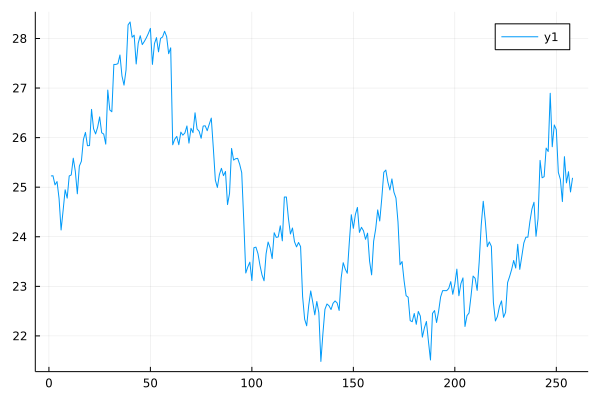

In [78]:
using Plots
#x = 0:size(comoditiesData.SilverPrice);
plot(comoditiesData.SilverPrice)
#plot!(x, comoditiesData.SilverPrice)

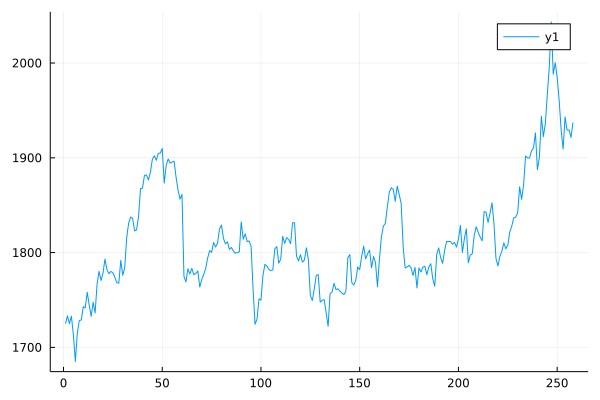

In [71]:
plot(comoditiesData.GoldPrice)

In [101]:
N = size(comoditiesData.BitcoinPrice64, 1);
A = Array((1:N));
A = [ones(N) A comoditiesData.GoldPrice comoditiesData.SilverPrice comoditiesData.OilPrice]; #Setting the matrix of the model
b = Array(comoditiesData.BitcoinPrice64); #vector with the current prices of bitcoin. (That's what we want to estimate)
println(b);

[54452.5, 52325.4, 51322.3, 55036.1, 57616.2, 58771.3, 58763.7, 58718.3, 58993.4, 57996.3, 55948.7, 58077.4, 58118.7, 59863.8, 63540.9, 62980.4, 63216.0, 61379.7, 55646.1, 56483.2, 53820.2, 51729.5, 51143.6, 54020.5, 55036.5, 54841.4, 53560.8, 57720.3, 57169.8, 53741.5, 57441.3, 56405.4, 57337.2, 55848.9, 56695.7, 49384.2, 49704.6, 49839.8, 43541.3, 42897.3, 36720.5, 40717.2, 37297.4, 38750.6, 38378.3, 39249.2, 38417.3, 35662.5, 36687.6, 37555.8, 39187.3, 36851.3, 33578.0, 33382.9, 37332.2, 36649.4, 37314.6, 40529.4, 40156.1, 38336.0, 38052.0, 35749.4, 31692.0, 32496.4, 33674.3, 34665.8, 31594.0, 34475.9, 35834.7, 35026.9, 33543.6, 33813.4, 34225.6, 33867.8, 32866.3, 33797.4, 33113.0, 32728.1, 32820.7, 31840.5, 31394.0, 30837.2, 29793.8, 32131.4, 32298.9, 33603.3, 37276.6, 39452.0, 40003.2, 40001.4, 42203.4, 39168.4, 38130.3, 39736.9, 40867.2, 42795.4, 46284.3, 45593.8, 45564.3, 44403.4, 47809.1, 45996.3, 44691.6, 44723.8, 46755.9, 49324.0, 49539.7, 47714.7, 48994.5, 46831.6, 49064.3, 

In [102]:
A

258×5 Matrix{Float64}:
 1.0    1.0  1725.1   25.227   57.76
 1.0    2.0  1733.2   25.231   61.18
 1.0    3.0  1725.1   25.047   58.56
 1.0    4.0  1732.78  25.114   60.97
 1.0    5.0  1713.16  24.771   61.56
 1.0    6.0  1685.16  24.137   60.55
 1.0    7.0  1715.24  24.532   59.16
 1.0    8.0  1728.4   24.948   61.45
 1.0    9.0  1728.8   24.78    58.65
 1.0   10.0  1743.0   25.227   59.33
 1.0   11.0  1741.6   25.247   59.77
 1.0   12.0  1758.2   25.585   59.6
 1.0   13.0  1744.8   25.325   59.32
 ⋮                            
 1.0  247.0  2043.3   26.895  119.4
 1.0  248.0  1988.2   25.816  123.7
 1.0  249.0  2000.4   26.256  108.7
 1.0  250.0  1985.0   26.16   106.02
 1.0  251.0  1960.8   25.298  109.33
 1.0  252.0  1929.7   25.158  103.01
 1.0  253.0  1909.2   24.71    96.44
 1.0  254.0  1943.2   25.616   95.04
 1.0  255.0  1929.3   25.087  102.714
 1.0  256.0  1929.5   25.313  104.056
 1.0  257.0  1921.5   24.904  110.83
 1.0  258.0  1937.3   25.189  109.768

In [103]:
using LinearAlgebra

#Using the QR descomposition implemented by Julia
qrA = qr(A);
x = qrA \ b;
x

5-element Vector{Float64}:
 149356.75648746028
    -13.5361390622061
    -46.107082527854864
   -833.1726678203818
     43.67697314031704

In [104]:
prediction = x[5]*A[:,5] + x[4]*A[:,4] +  x[3]*A[:,3] +  x[2]*A[:,2] + x[1]*ones(N,1) #Setting the equation of the estimator

258×1 Matrix{Float64}:
 51308.22735707559
 51067.26640700636
 51466.067737671096
 51147.868141319166
 52350.500600668645
 54112.080500912794
 52321.8291229586
 51454.94421650788
 51440.64272783547
 50429.65817609744
 50483.22636739956
 49415.27521121781
 50223.96931918287
     ⋮
 34609.580101854226
 38223.34850315837
 36625.5553863106
 37284.998606272085
 39250.01948513958
 40511.01931594171
 41528.98201035216
 39131.802865901205
 40535.08060713195
 40382.64052659107
 41374.59648494274
 40348.7292861366

In [129]:
#Plotting the results. Comparing the current bitcoin's prices with the values given by the comodities estimator
plot(A[:,2], [b, prediction], labels = ["Bitcoin Price" "Comodities Estimator"], lw = [2 3])
xlabel!("Days")
ylabel!("Price(USD)")
